In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DF = pd.read_excel("PQM Dataset.xlsx", sheet_name = "RMS_10Min")

In [3]:
print("Data Shape:", DF.shape)
print("\nFirst few rows:\n", DF.head())
print("\n")
print("\nBasic info:\n", DF.info())
print("\nDescriptive statistics:\n", DF.describe())
print("\nNumber of missing values in each column:\n", DF.isnull().sum())

Data Shape: (360300, 73)

First few rows:
    TimeID     Col_1     Col_2     Col_3     Col_4     Col_5     Col_6  \
0       1  1576.932  1549.015  1611.243  131.5002  131.5002  131.5002   
1       2  1574.957  1549.886  1612.538  154.8364  131.5002  157.8388   
2       3  1577.413  1546.782  1616.393  142.4272  131.5002  157.8388   
3       4  1574.813  1548.547  1610.386  157.8388  157.8388  157.8388   
4       5  1581.134  1556.655  1612.536  157.8388  157.8388  157.8388   

      Col_7     Col_8     Col_9  ...    Col_63  Col_64    Col_65    Col_66  \
0  151.6503  117.6174  216.8820  ...  2.233658     0.0  15.19024  3.525095   
1  148.7471  117.6174  207.0803  ...  0.000000     0.0   0.00000  0.000000   
2  145.1155  128.8749  220.0266  ...  0.000000     0.0   0.00000  0.000000   
3  150.1414  117.6174  196.7909  ...  0.000000     0.0   0.00000  0.000000   
4  158.3065  105.2259  216.8820  ...  0.000000     0.0   0.00000  0.000000   

     Col_67    Col_68    Col_69    Col_70    Col_

In [4]:
DF_first13 = DF.iloc[:,:13]
cleanDF = DF_first13.fillna(DF.mean())
#cleanDF = DF_first13.fillna(0)

In [5]:
def find_mean(data):
    mean = np.mean(data)
    return mean

def find_median(data):
    median = np.median(data)
    return median

def find_std_dev(data):
    std_dev = np.std(data)
    return std_dev

Statistics for each column:


Column: Col_1
Mean: 180150.5000
Median: 180150.5000
Standard Deviation: 104009.6510


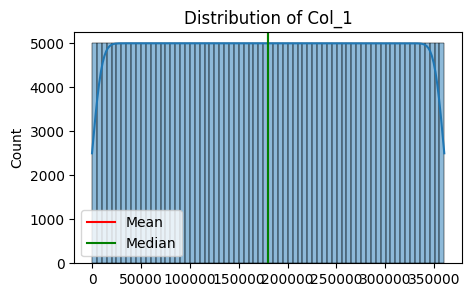


Column: Col_2
Mean: 73674.8656
Median: 78431.2800
Standard Deviation: 18769.3366


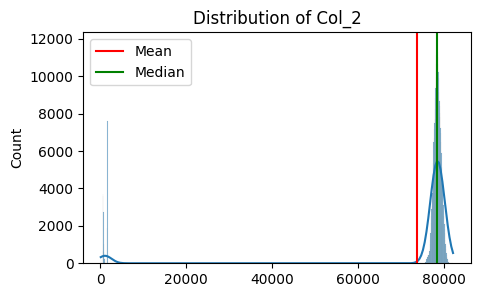


Column: Col_3
Mean: 73594.7074
Median: 78354.1250
Standard Deviation: 18758.0925


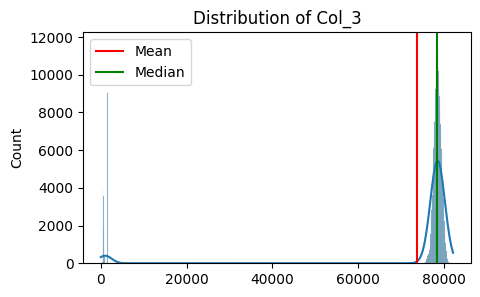


Column: Col_4
Mean: 73748.9021
Median: 78507.1300
Standard Deviation: 18781.0355


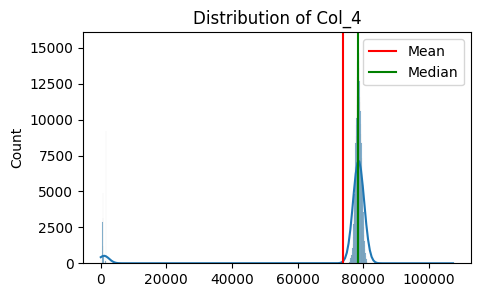


Column: Col_5
Mean: 77004.5541
Median: 79037.0000
Standard Deviation: 12737.8446


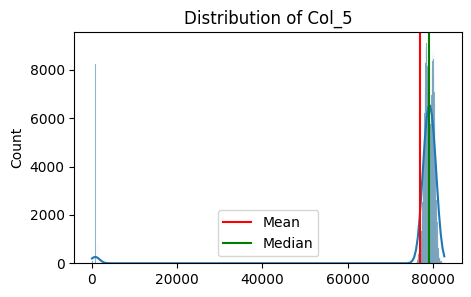


Column: Col_6
Mean: 76923.4574
Median: 78960.9850
Standard Deviation: 12729.2522


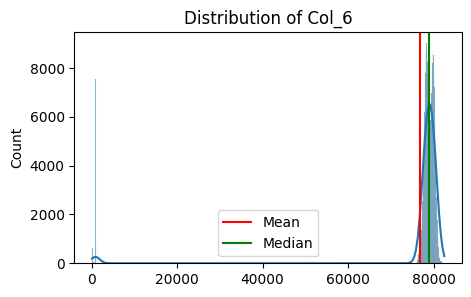


Column: Col_7
Mean: 77078.9163
Median: 79107.8050
Standard Deviation: 12749.2948


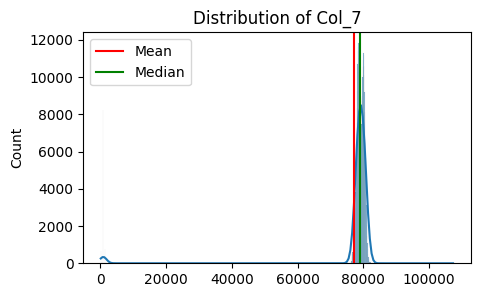


Column: Col_8
Mean: 76390.6394
Median: 78466.3100
Standard Deviation: 12619.8900


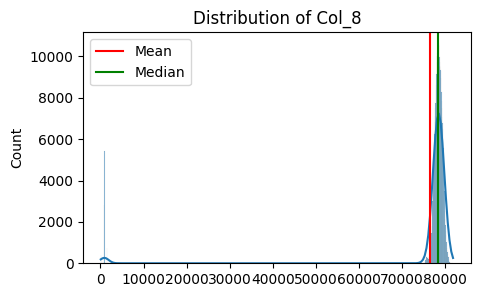


Column: Col_9
Mean: 76310.4126
Median: 78389.0450
Standard Deviation: 12611.6511


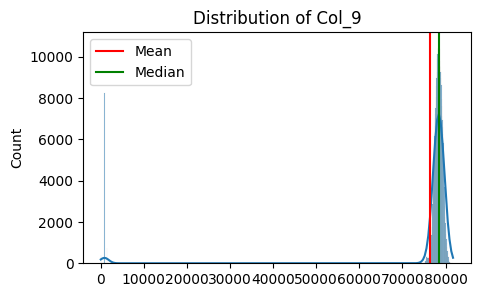


Column: Col_10
Mean: 76464.6400
Median: 78540.6100
Standard Deviation: 12630.9254


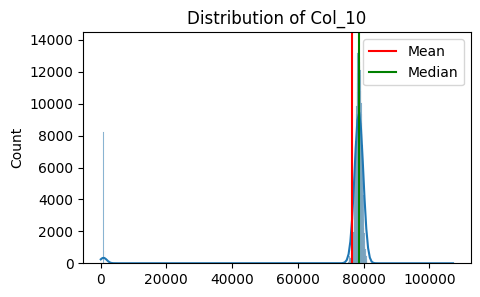


Column: Col_11
Mean: 73633.3357
Median: 78391.9600
Standard Deviation: 18765.8720


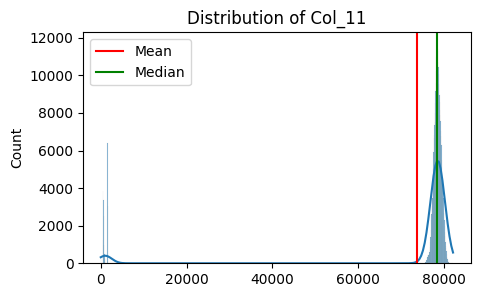


Column: Col_12
Mean: 73710.8163
Median: 78468.9450
Standard Deviation: 18774.7620


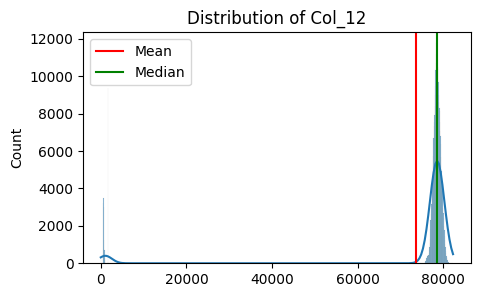

In [6]:
# calculating statistics for each column
print("Statistics for each column:\n")

cols = [col for col in cleanDF.columns if col != 'TimeID']

for i, column in enumerate(cols):
    data = cleanDF.iloc[:, i].values
    
    print(f"\nColumn: {column}")
    print(f"Mean: {find_mean(data):.4f}")
    print(f"Median: {find_median(data):.4f}")
    print(f"Standard Deviation: {find_std_dev(data):.4f}")

    plt.figure(figsize=(5, 3))
    sns.histplot(data, kde=True)
    plt.axvline(find_mean(data), color='red', label='Mean')
    plt.axvline(find_median(data), color='green', label='Median')
    plt.legend()
    plt.title(f"Distribution of {column}")
    plt.show()
    


Outliers for each column (Z-score > 3):


Column: Col_1
Number of outliers: 22523


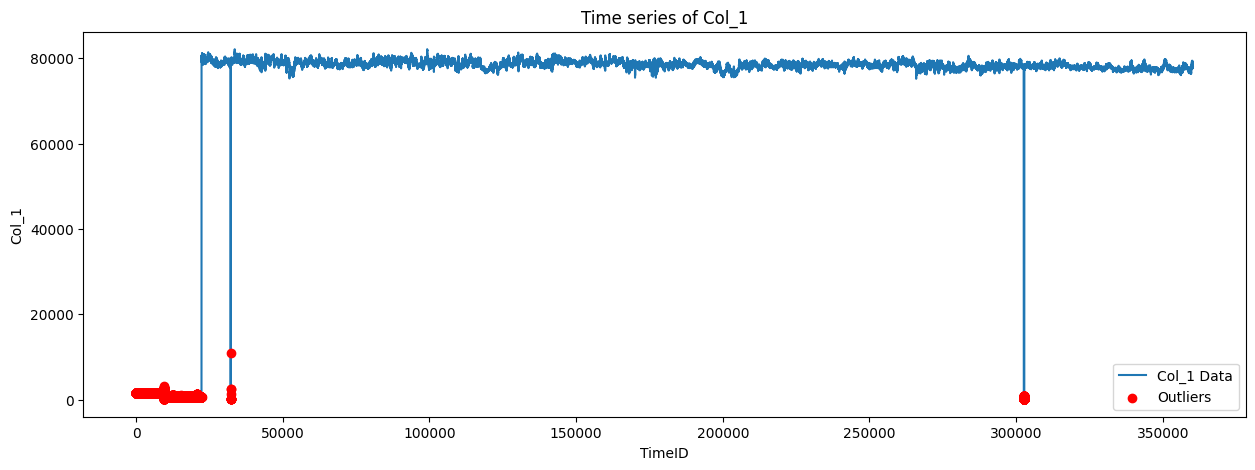


Column: Col_2
Number of outliers: 22527


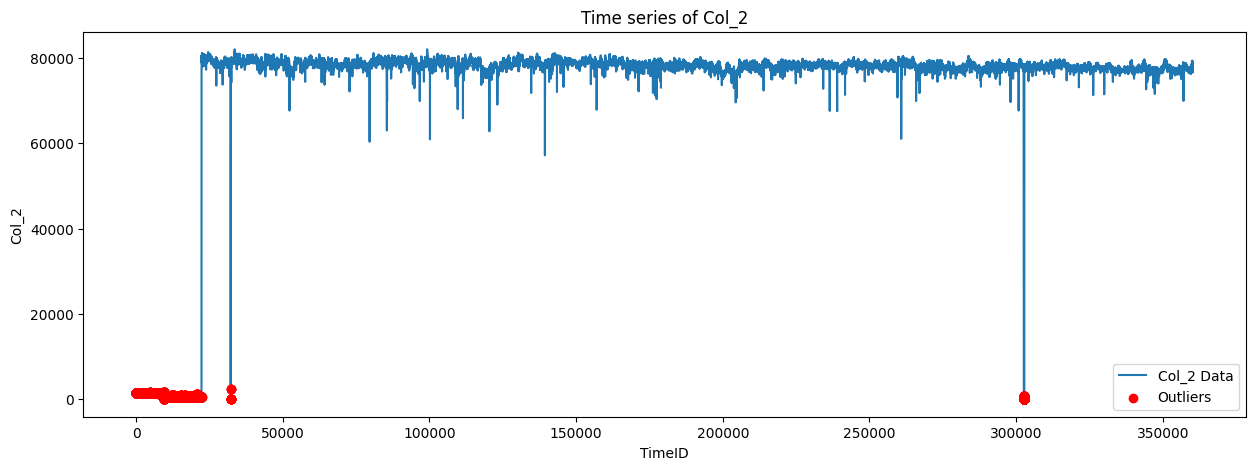


Column: Col_3
Number of outliers: 22522


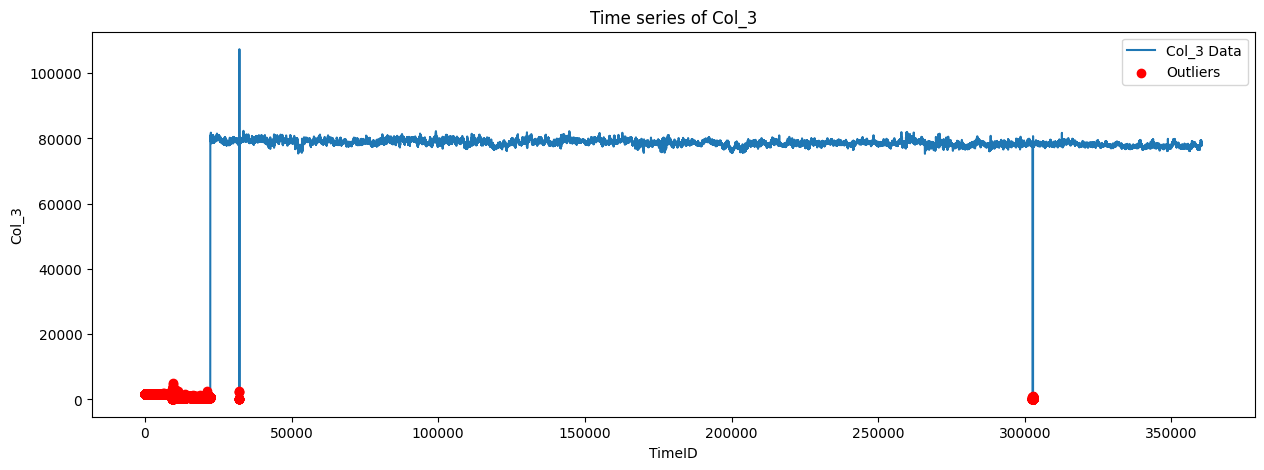


Column: Col_4
Number of outliers: 9751


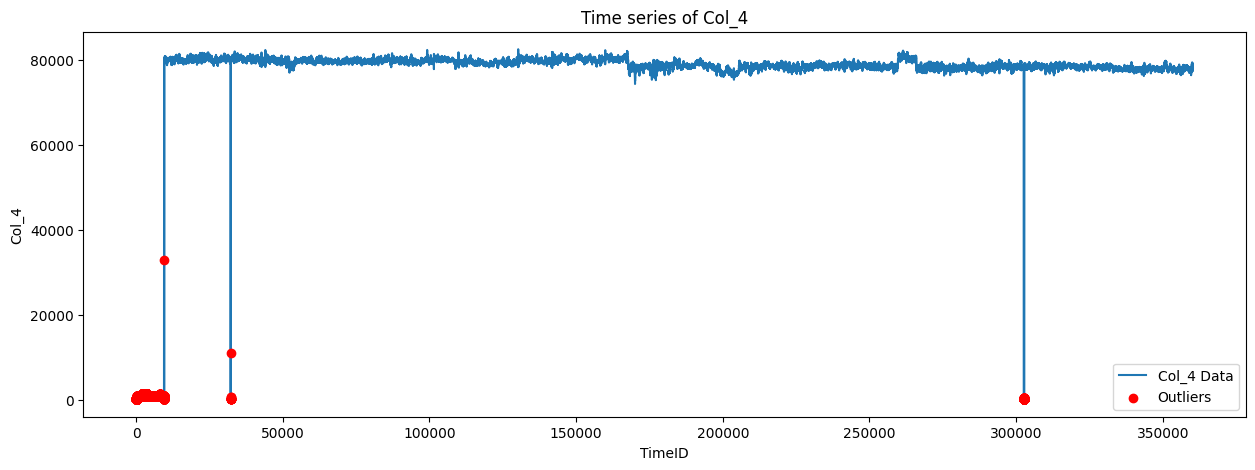


Column: Col_5
Number of outliers: 9756


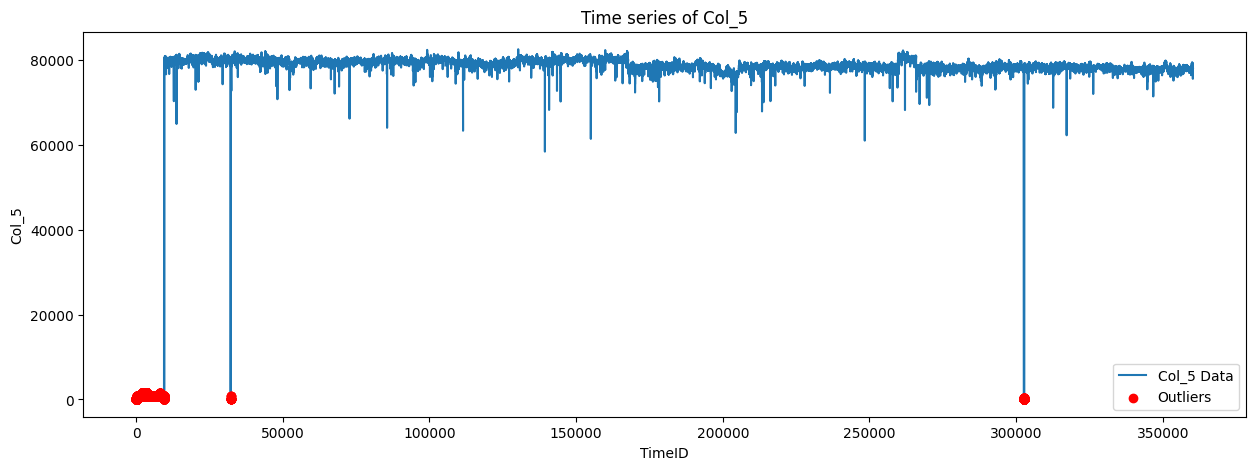


Column: Col_6
Number of outliers: 9749


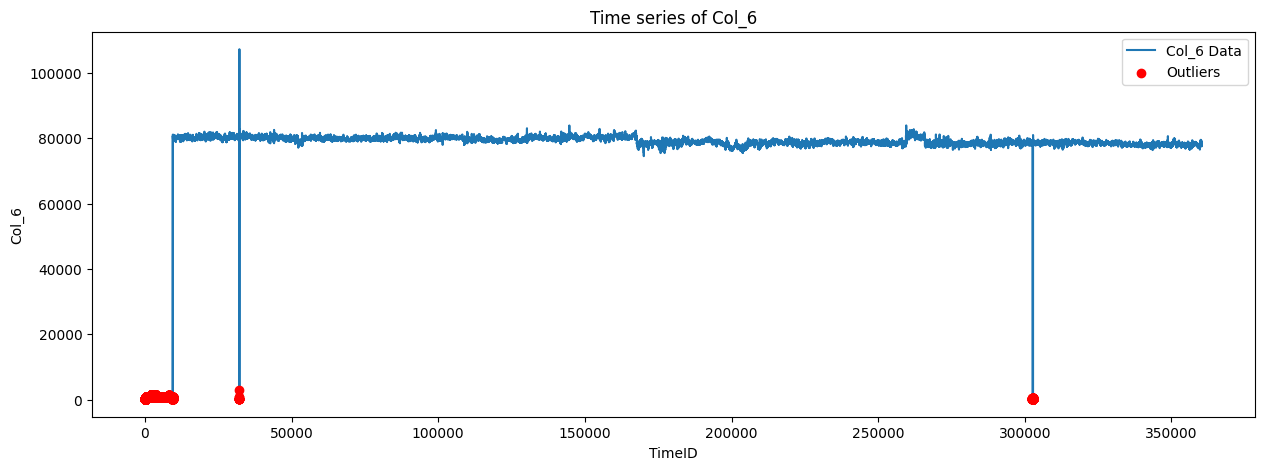


Column: Col_7
Number of outliers: 9751


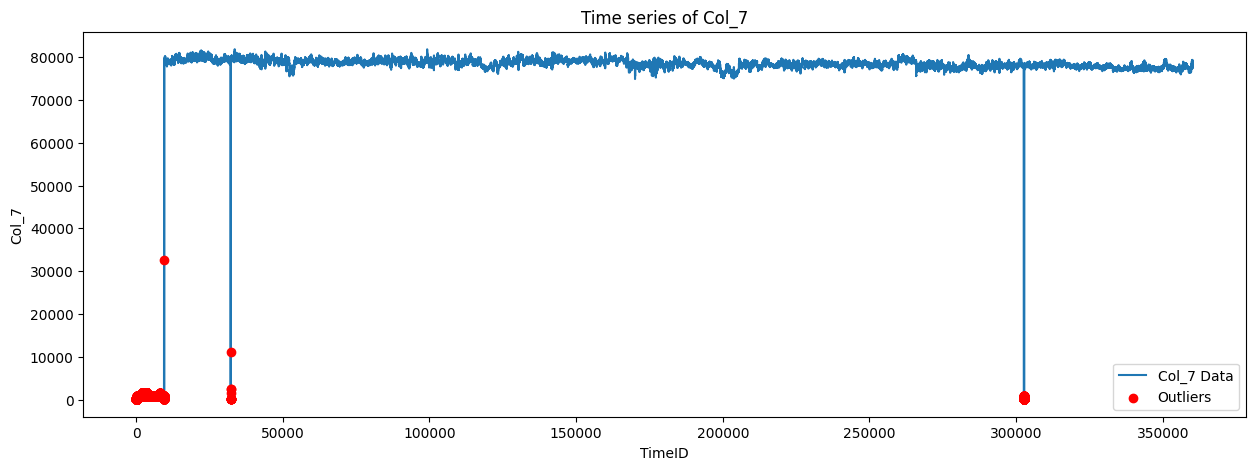


Column: Col_8
Number of outliers: 9756


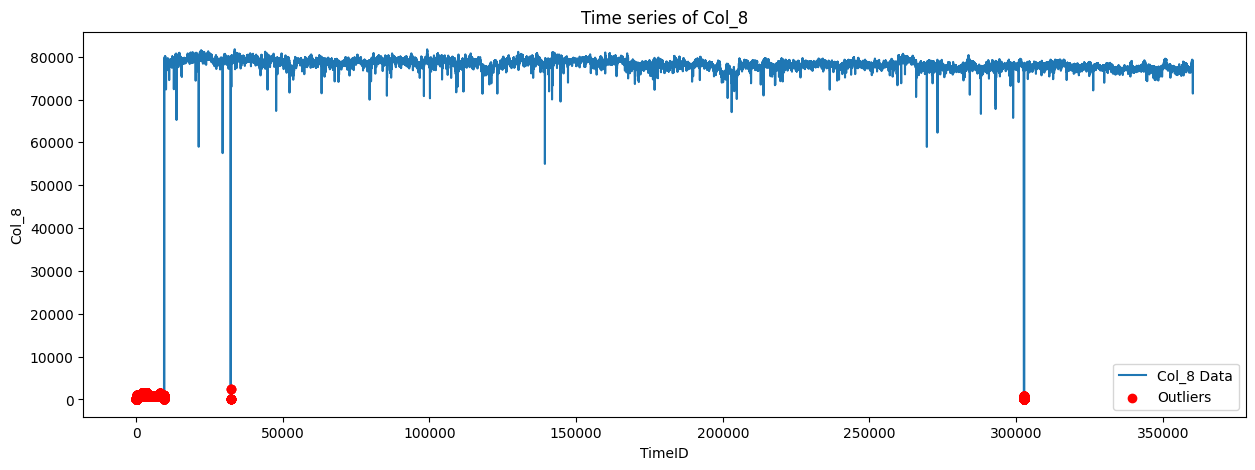


Column: Col_9
Number of outliers: 9749


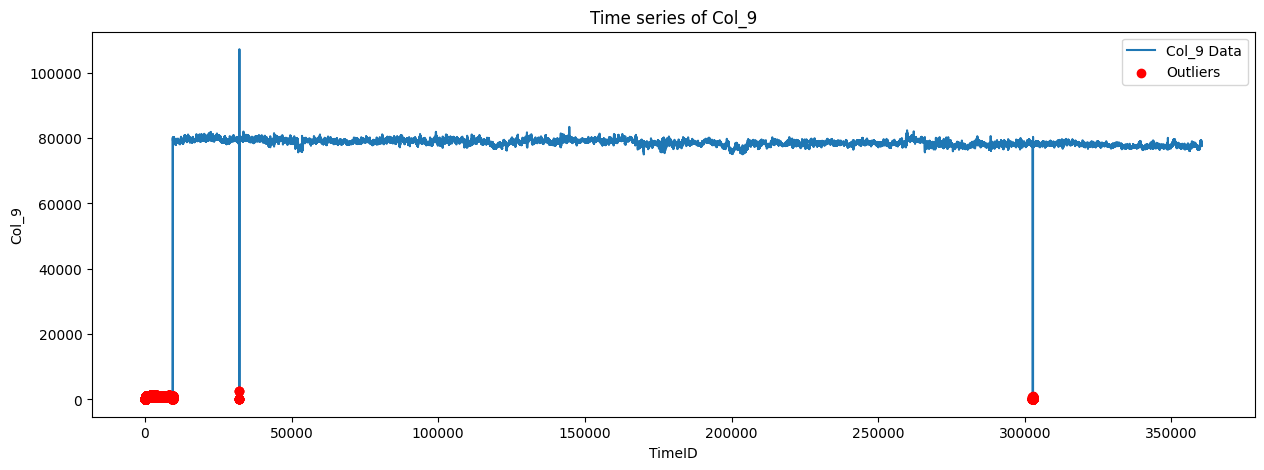


Column: Col_10
Number of outliers: 22523


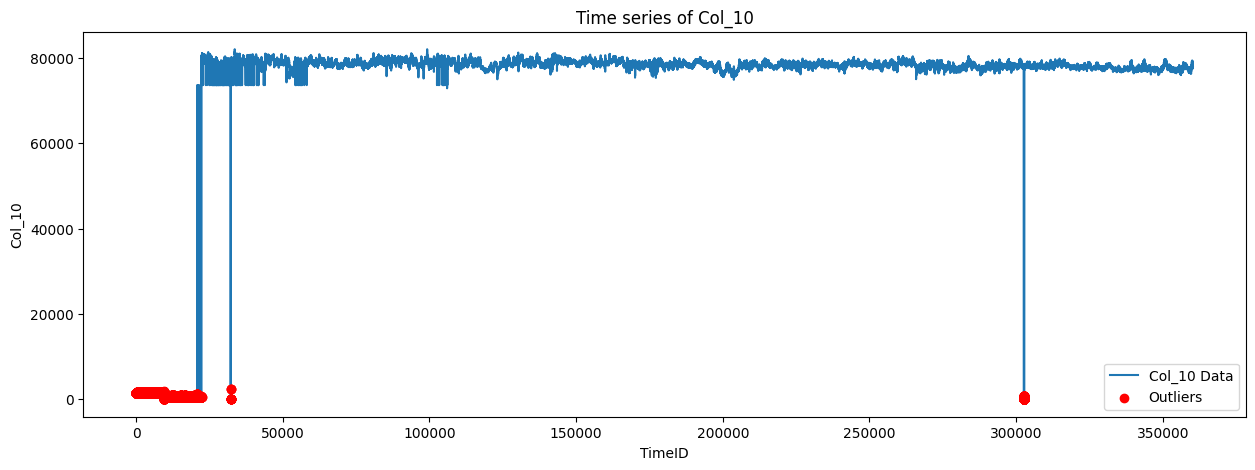


Column: Col_11
Number of outliers: 22519


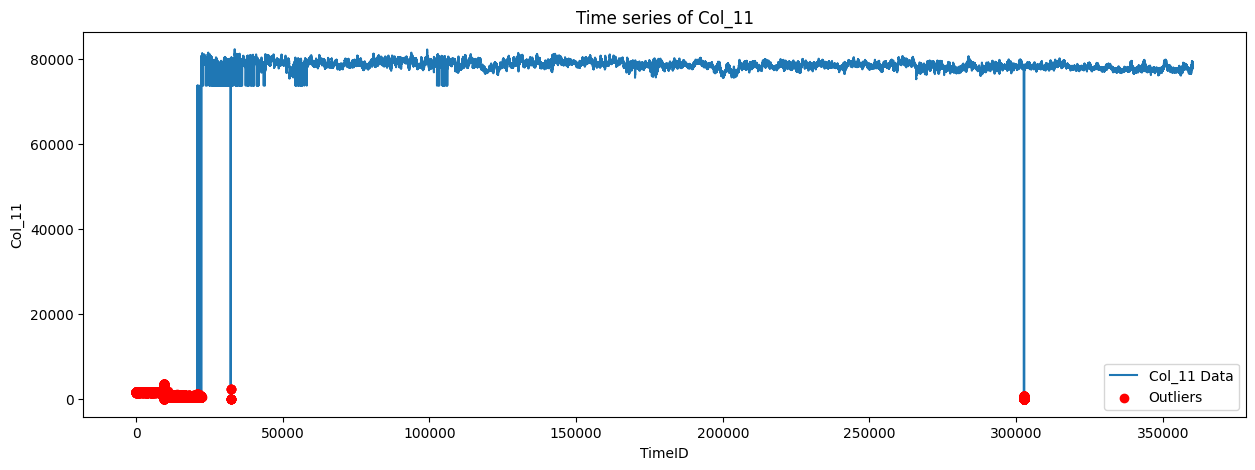


Column: Col_12
Number of outliers: 22519


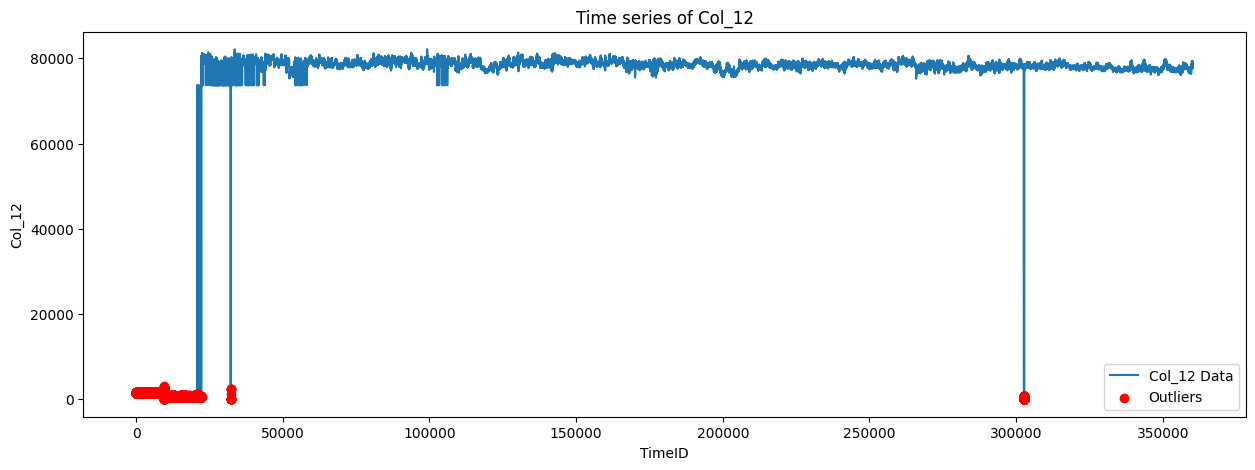

In [7]:
# calculating outliers using Z-scoring
print("\nOutliers for each column (Z-score > 3):\n")

columns = [col for col in cleanDF.columns if col != 'TimeID']
time_data = cleanDF['TimeID'].values

for column in columns:
    feature_data = cleanDF[column].values
    
    mean = find_mean(feature_data)
    std_dev = find_std_dev(feature_data)
    
    z_scores = (feature_data - mean) / std_dev
    outliers = np.abs(z_scores) > 3
    
    print(f"\nColumn: {column}")
    print(f"Number of outliers: {np.sum(outliers)}")
    
    plt.figure(figsize=(15, 5))
    plt.plot(time_data, feature_data, label = f'{column} Data')
    plt.scatter(time_data[outliers], feature_data[outliers], color='red', label= 'Outliers', zorder = 5)
    plt.title(f"Time series of {column}")
    plt.xlabel("TimeID")
    plt.ylabel(column)
    plt.legend()
    plt.show()